In [1]:
cd C:\Users\jialitao\Documents\Project\DR\05. data\survival analysis

C:\Users\jialitao\Documents\Project\DR\05. data\survival analysis


In [5]:
import pandas as pd
import numpy as np
import lifelines
from lifelines.utils import datetimes_to_durations
from lifelines import CoxPHFitter
import lifelines as sa
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('df_cox_master.csv')
df.columns

Index(['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'midpoint_Latitude', 'midpoint_Longitude', 'weather_station', 'Sum'],
      dtype='object')

In [3]:
df_cox_J=pd.read_csv('df_cox_master_J.csv')
df_cox_J.columns

Index(['Asset_Number', 'ELR', 'Grouping_Full_Name', 'Engineering_Suffix',
       'System_Asset_Type', 'EQUIP_CLASS_DESC', 'birth', 'death', 'event',
       'duration', 'T', 'Start_Latitude', 'Start_Longitude', 'End_Latitude',
       'End_Longitude', 'midpoint_Latitude', 'midpoint_Longitude',
       'weather_station', 'Sum', 'High_Level_Asset_Class',
       'Asset_Class_Grouping'],
      dtype='object')

In [4]:
df=df_cox_J[['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'midpoint_Latitude', 'midpoint_Longitude', 'weather_station', 'Sum']]

In [5]:
weather = pd.read_csv('wheater_names_loc.csv')

In [6]:
#weather = pd.read_csv('Weather_data_nameloc.csv')

In [7]:
# Remove trailing ' +0000 UTC' characters from dt_iso
weather['dt_iso'] = weather['dt_iso'].str[:-10]

In [8]:
# Transform date str into datetime
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'])

In [9]:
# Drop all columns not used in analysis
weather.drop(weather.columns.difference(['city_name','dt_iso','temp','temp_min', 'temp_max',
                                         'pressure','humidity','wind_speed', 'clouds_all',
                                        'weather_main']),axis = 1, inplace=True)

In [10]:
df[df['End_Latitude'].isnull()]

,Asset_Number,ELR,High_Level_Asset_Class,Asset_Class_Grouping,Grouping_Full_Name,Engineering_Suffix,System_Asset_Type,EQUIP_CLASS_DESC,birth,death,...,duration,T,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,midpoint_Latitude,midpoint_Longitude,weather_station,Sum
55,2558617,HUL4,E&P,OLE,OLE,OLE STRUCTURE,OLE STRUCT - HEADSPAN ANCHOR,UI - OLE Structure ...,2018-04-06 14:45:00 UTC,2018-04-13 16:29:00 UTC,...,7 days 01:44:00.000000000,7.072222,53.791585,-1.511601,NaN,NaN,NaN,NaN,Huddersfield,5.0
56,2558617,HUL4,E&P,OLE,OLE,OLE STRUCTURE,OLE STRUCT - HEADSPAN ANCHOR,UI - OLE Structure ...,2018-04-13 18:00:00 UTC,2017-04-17 05:55:00 UTC,...,-362 days +11:55:00.000000000,-361.503472,53.791585,-1.511601,NaN,NaN,NaN,NaN,Huddersfield,5.0
57,2402964,HUL4,E&P,OLE,OLE,OLE STRUCTURE,OLE STRUCT - MAST,UI - OLE Structure ...,2017-01-15 20:36:01 UTC,NaN,...,956 days 17:57:26.082030000,956.748219,53.796622,-1.531652,NaN,NaN,NaN,NaN,Huddersfield,1.0
58,1054743,DOL2,E&P,OLE,OLE,OLE STRUCTURE,OLE STRUCT - PORTAL,UI - OLE Structure ...,2018-04-14 01:24:00 UTC,NaN,...,503 days 13:09:27.024781000,503.548229,53.793762,-1.550760,NaN,NaN,NaN,NaN,Huddersfield,4.0
59,2558608,HUL4,E&P,OLE,OLE,OLE STRUCTURE,OLE STRUCT - PORTAL,UI - OLE Structure ...,2018-02-25 04:30:00 UTC,NaN,...,551 days 10:03:27.090712000,551.419064,53.794881,-1.542866,NaN,NaN,NaN,NaN,Huddersfield,6.0
60,2558343,HUL4,E&P,OLE,OLE,OLE STRUCTURE,OLE STRUCT - HEADSPAN,UI - OLE Structure ...,2017-06-05 10:40:00 UTC,NaN,...,816 days 03:53:27.090512000,816.162119,53.791502,-1.503980,NaN,NaN,NaN,NaN,Huddersfield,6.0
61,1624700,HAJ,E&P,OLE,OLE,SIGNAL,SIGNAL HEAD - 2 ASPECT,UI - OLE Structure ...,2018-04-10 00:30:00 UTC,NaN,...,507 days 14:03:27.059525000,507.585730,53.456634,-2.067150,NaN,NaN,NaN,NaN,Huddersfield,NaN
62,1624685,HAJ,E&P,OLE,OLE,SIGNAL,SIGNAL HEAD - 3 ASPECT,UI - OLE Structure ...,2018-04-23 07:27:00 UTC,NaN,...,494 days 07:06:27.059297000,494.296147,53.461603,-2.080516,NaN,NaN,NaN,NaN,Huddersfield,NaN
63,990439,ECM4,E&P,OLE,OLE,OLE STRUCTURE,OLE STRUCT - CANTILEVER,UI - OLE Structure ...,2018-03-17 10:15:00 UTC,NaN,...,531 days 04:18:26.993259000,531.179479,53.957272,-1.093735,NaN,NaN,NaN,NaN,Huddersfield,NaN
64,992941,ECM3,E&P,OLE,OLE,OLE STRUCTURE,OLE STRUCT - CANTILEVER,UI - OLE Structure ...,2018-02-24 10:26:00 UTC,NaN,...,552 days 04:07:26.993676000,552.171840,53.727598,-1.092213,NaN,NaN,NaN,NaN,Huddersfield,NaN


In [11]:
df['End_Latitude']=df['End_Latitude'].fillna(df['Start_Latitude'])
df['End_Longitude']=df['End_Longitude'].fillna(df['Start_Longitude'])
df['midpoint_Latitude']=df['midpoint_Latitude'].fillna(df['Start_Latitude'])
df['midpoint_Longitude']=df['midpoint_Longitude'].fillna(df['Start_Longitude'])

In [12]:
df['midpoint_Latitude'] = (df['Start_Latitude']+df['End_Latitude'])/2
df['midpoint_Longitude'] = (df['Start_Longitude']+df['End_Longitude'])/2

In [13]:
df[df['End_Latitude'].isnull()]

,Asset_Number,ELR,High_Level_Asset_Class,Asset_Class_Grouping,Grouping_Full_Name,Engineering_Suffix,System_Asset_Type,EQUIP_CLASS_DESC,birth,death,...,duration,T,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,midpoint_Latitude,midpoint_Longitude,weather_station,Sum


In [14]:
# Create dictionary containing the lat and long values of the 5 weather stations in our weather data
station_location = {'Huddersfield': [53.6458, -1.785],
                    'Leeds': [53.8008, -1.5491],
                    'Manchester': [53.4808, -2.2426],
                    'Mirfield': [53.6801, -1.6967],
                    'York': [53.96, -1.0873]
                   }

In [15]:
# Create function that calculates the distance between two geographical points using the Haversine formula
from math import cos, asin, sqrt
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a)) 

In [16]:
# Create function that finds the nearest weather station from a specified location
def minimise(df, station_location):
    d = {}
    for key in station_location:
        d[key] = distance(df['midpoint_Latitude'], df['midpoint_Longitude'], station_location[key][0],station_location[key][1])
    return min(d, key=d.get)

In [17]:
# Populate dataframe with results from 'minimise' function
df['weather_station'] = df.apply(lambda row: minimise(row, station_location), axis=1)

In [18]:
df.isnull().sum()

Asset_Number                0
ELR                         0
High_Level_Asset_Class      0
Asset_Class_Grouping        0
Grouping_Full_Name         25
Engineering_Suffix          0
System_Asset_Type           0
EQUIP_CLASS_DESC            0
birth                       0
death                     636
event                       0
duration                    0
T                           0
Start_Latitude              0
Start_Longitude             0
End_Latitude                0
End_Longitude               0
midpoint_Latitude           0
midpoint_Longitude          0
weather_station             0
Sum                       292
dtype: int64

In [19]:
df['Grouping_Full_Name']=df['Grouping_Full_Name'].fillna('NA')
df['Sum']=df['Sum'].fillna('0')

In [20]:
df.isnull().sum()

Asset_Number                0
ELR                         0
High_Level_Asset_Class      0
Asset_Class_Grouping        0
Grouping_Full_Name          0
Engineering_Suffix          0
System_Asset_Type           0
EQUIP_CLASS_DESC            0
birth                       0
death                     636
event                       0
duration                    0
T                           0
Start_Latitude              0
Start_Longitude             0
End_Latitude                0
End_Longitude               0
midpoint_Latitude           0
midpoint_Longitude          0
weather_station             0
Sum                         0
dtype: int64

In [21]:
df.to_csv('df_cox_master_v0.1.csv')

In [22]:
df.columns

Index(['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'midpoint_Latitude', 'midpoint_Longitude', 'weather_station', 'Sum'],
      dtype='object')

In [23]:
df_cox2=df[['Asset_Number','ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type', 'EQUIP_CLASS_DESC', 
           'birth', 'death', 'event', 'duration', 'T', 'weather_station', 'Sum']].copy()

In [24]:
df_cox2

,Asset_Number,ELR,High_Level_Asset_Class,Asset_Class_Grouping,Grouping_Full_Name,Engineering_Suffix,System_Asset_Type,EQUIP_CLASS_DESC,birth,death,event,duration,T,weather_station,Sum
0,1011867,NOC,E&P,E&P,E&P,GENERATOR / SHORE SUPPLY,DIESEL GENERATOR SET - 650V,Diesel Alternator Set ...,2017-02-18 04:00:01 UTC,NaN,0,923 days 10:33:25.995877000,923.439884,Leeds,113
1,1648347,MVN2,E&P,E&P,E&P,TRACK CIRCUIT,TRACK CCT -DC MED VOLT AC IMMUNE,Diesel Alternator Set ...,2017-07-06 06:10:00 UTC,NaN,0,785 days 08:23:27.059722000,785.349619,Manchester,101
2,1063020,NOC,E&P,E&P,E&P,LEVEL CROSSING LIGHTING,LIGHTING SYSTEM - LEVEL CROSSING,Light InstalSys ...,2017-05-18 15:30:01 UTC,NaN,0,833 days 23:03:26.026606000,833.960718,York,24
3,10290424,TCW1,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2017-05-22 10:06:01 UTC,NaN,0,830 days 04:27:26.108569000,830.185719,York,19
4,14105964,CFM,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2018-06-06 20:06:00 UTC,2018-04-12 13:13:00 UTC,1,-56 days +17:07:00.000000000,-55.286806,York,19
5,14105964,CFM,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2018-04-12 15:05:00 UTC,2017-01-11 22:34:44 UTC,1,-456 days +07:29:44.000000000,-455.687685,York,19
6,14105964,CFM,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2017-01-12 01:00:01 UTC,2017-05-10 14:58:36 UTC,1,118 days 13:58:35.000000000,118.582350,York,19
7,14105964,CFM,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2017-05-10 19:00:01 UTC,NaN,0,841 days 19:33:26.115776000,841.814886,York,19
8,10290512,NOC,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2018-04-13 10:50:00 UTC,2018-02-21 23:02:00 UTC,1,-51 days +12:12:00.000000000,-50.491667,Leeds,20
9,10290474,DOL2,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2017-04-07 09:00:01 UTC,NaN,0,875 days 05:33:26.108770000,875.231552,Leeds,18


In [26]:
df_cox2['birth']=pd.to_datetime(df_cox2['birth'],utc=True)
df_cox2['death']=pd.to_datetime(df_cox2['death'],utc=True)
df_cox2['birth'] =df_cox2['birth'].dt.tz_localize(None)
df_cox2['death'] =df_cox2['death'].dt.tz_localize(None)

In [27]:
df_cox2['birth']=pd.to_datetime(df_cox2['birth'], format='%d/%m/%Y %H:%M')
df_cox2['death']=pd.to_datetime(df_cox2['death'], format='%d/%m/%Y %H:%M')

In [28]:
# Define functions to return average temperature, pressure, humidity and wind speeds within the last day and 7 days 
# of a 'death'
def temp_average_24h_d(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=1)) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['temp'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=1))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['temp'].median()
    
def pressure_average_24h_d(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=1))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['pressure'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=1))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['pressure'].median()
    
def humidity_average_24h_d(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=1))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['humidity'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=1))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['humidity'].median()
    
    
def wind_speed_average_24h_d(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=1))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['wind_speed'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=1))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['wind_speed'].median()

In [29]:
df_cox2['temp_24h_d'] = df_cox2.apply(lambda row: temp_average_24h_d(row), axis=1)
df_cox2['pressure_24h_d'] = df_cox2.apply(lambda row: pressure_average_24h_d(row), axis=1)
df_cox2['humidity_24h_d'] = df_cox2.apply(lambda row: humidity_average_24h_d(row), axis=1)
df_cox2['wind_speed_24h_d'] = df_cox2.apply(lambda row: wind_speed_average_24h_d(row), axis=1)

In [30]:
# min average temp 24h before death
def temp_average_24h_d_l(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=1)) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['temp_min'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=1))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['temp_min'].median()
    
# max average temp 24h before death
def temp_average_24h_d_h(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=1)) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['temp_max'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=1))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['temp_max'].median()

In [31]:
df_cox2['temp_24h_d_l'] = df_cox2.apply(lambda row: temp_average_24h_d_l(row), axis=1)
df_cox2['temp_24h_d_h'] = df_cox2.apply(lambda row: temp_average_24h_d_h(row), axis=1)

In [32]:
df_cox2['temp_24h_d']= df_cox2['temp_24h_d'] - 273.15
df_cox2['temp_24h_d_l']= df_cox2['temp_24h_d_l'] - 273.15
df_cox2['temp_24h_d_h']= df_cox2['temp_24h_d_h'] - 273.15
df_cox2.head()

,Asset_Number,ELR,High_Level_Asset_Class,Asset_Class_Grouping,Grouping_Full_Name,Engineering_Suffix,System_Asset_Type,EQUIP_CLASS_DESC,birth,death,...,duration,T,weather_station,Sum,temp_24h_d,pressure_24h_d,humidity_24h_d,wind_speed_24h_d,temp_24h_d_l,temp_24h_d_h
0,1011867,NOC,E&P,E&P,E&P,GENERATOR / SHORE SUPPLY,DIESEL GENERATOR SET - 650V,Diesel Alternator Set ...,2017-02-18 04:00:01,NaT,...,923 days 10:33:25.995877000,923.439884,Leeds,113,16.420,1006.0,88.0,4.0,15.00,17.78
1,1648347,MVN2,E&P,E&P,E&P,TRACK CIRCUIT,TRACK CCT -DC MED VOLT AC IMMUNE,Diesel Alternator Set ...,2017-07-06 06:10:00,NaT,...,785 days 08:23:27.059722000,785.349619,Manchester,101,NaN,NaN,NaN,NaN,NaN,NaN
2,1063020,NOC,E&P,E&P,E&P,LEVEL CROSSING LIGHTING,LIGHTING SYSTEM - LEVEL CROSSING,Light InstalSys ...,2017-05-18 15:30:01,NaT,...,833 days 23:03:26.026606000,833.960718,York,24,16.560,1005.0,93.0,4.0,15.56,17.78
3,10290424,TCW1,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2017-05-22 10:06:01,NaT,...,830 days 04:27:26.108569000,830.185719,York,19,16.560,1005.0,93.0,4.0,15.56,17.78
4,14105964,CFM,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2018-06-06 20:06:00,2018-04-12 13:13:00,...,-56 days +17:07:00.000000000,-55.286806,York,19,5.675,1009.0,100.0,4.0,5.00,6.00


In [33]:
df_cox2['temp_24h_range']= df_cox2['temp_24h_d_h'] - df_cox2['temp_24h_d_l']

In [34]:
# Define functions to return average temperature, pressure, humidity and wind speeds within the last day and 7 days 
# of a 'death'
def temp_average_1w_d(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=7)) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['temp'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=7))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['temp'].median()
    
def pressure_average_1w_d(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=7))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['pressure'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=7))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['pressure'].median()
    
def humidity_average_1w_d(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=7))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['humidity'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=7))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['humidity'].median()
      
def wind_speed_average_1w_d(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=7))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['wind_speed'].median()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=7))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['wind_speed'].median()

In [35]:
df_cox2['temp_1w_d'] = df_cox2.apply(lambda row: temp_average_1w_d(row), axis=1)
df_cox2['pressure_1w_d'] = df_cox2.apply(lambda row: pressure_average_1w_d(row), axis=1)
df_cox2['humidity_1w_d'] = df_cox2.apply(lambda row: humidity_average_1w_d(row), axis=1)
df_cox2['wind_speed_1w_d'] = df_cox2.apply(lambda row: wind_speed_average_1w_d(row), axis=1)

In [36]:
def wind_speed_average_24h_d_h(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=1))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['wind_speed'].max()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=1))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['wind_speed'].max()
    
def wind_speed_average_24h_d_l(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=1))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['wind_speed'].min()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=1))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['wind_speed'].min()

In [37]:
df_cox2['wind_speed_24h_d_h'] = df_cox2.apply(lambda row: wind_speed_average_24h_d_h(row), axis=1)
df_cox2['wind_speed_24h_d_l'] = df_cox2.apply(lambda row: wind_speed_average_24h_d_l(row), axis=1)

In [39]:
df_cox2.head()

,Asset_Number,ELR,High_Level_Asset_Class,Asset_Class_Grouping,Grouping_Full_Name,Engineering_Suffix,System_Asset_Type,EQUIP_CLASS_DESC,birth,death,...,wind_speed_24h_d,temp_24h_d_l,temp_24h_d_h,temp_24h_range,temp_1w_d,pressure_1w_d,humidity_1w_d,wind_speed_1w_d,wind_speed_24h_d_h,wind_speed_24h_d_l
0,1011867,NOC,E&P,E&P,E&P,GENERATOR / SHORE SUPPLY,DIESEL GENERATOR SET - 650V,Diesel Alternator Set ...,2017-02-18 04:00:01,NaT,...,4.0,15.00,17.78,2.78,289.69,1006.0,88.0,4.0,7.0,3.0
1,1648347,MVN2,E&P,E&P,E&P,TRACK CIRCUIT,TRACK CCT -DC MED VOLT AC IMMUNE,Diesel Alternator Set ...,2017-07-06 06:10:00,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1063020,NOC,E&P,E&P,E&P,LEVEL CROSSING LIGHTING,LIGHTING SYSTEM - LEVEL CROSSING,Light InstalSys ...,2017-05-18 15:30:01,NaT,...,4.0,15.56,17.78,2.22,290.22,1005.0,88.0,3.0,6.0,2.0
3,10290424,TCW1,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2017-05-22 10:06:01,NaT,...,4.0,15.56,17.78,2.22,290.22,1005.0,88.0,3.0,6.0,2.0
4,14105964,CFM,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2018-06-06 20:06:00,2018-04-12 13:13:00,...,4.0,5.00,6.00,1.00,280.01,1008.0,93.0,4.0,5.0,3.0


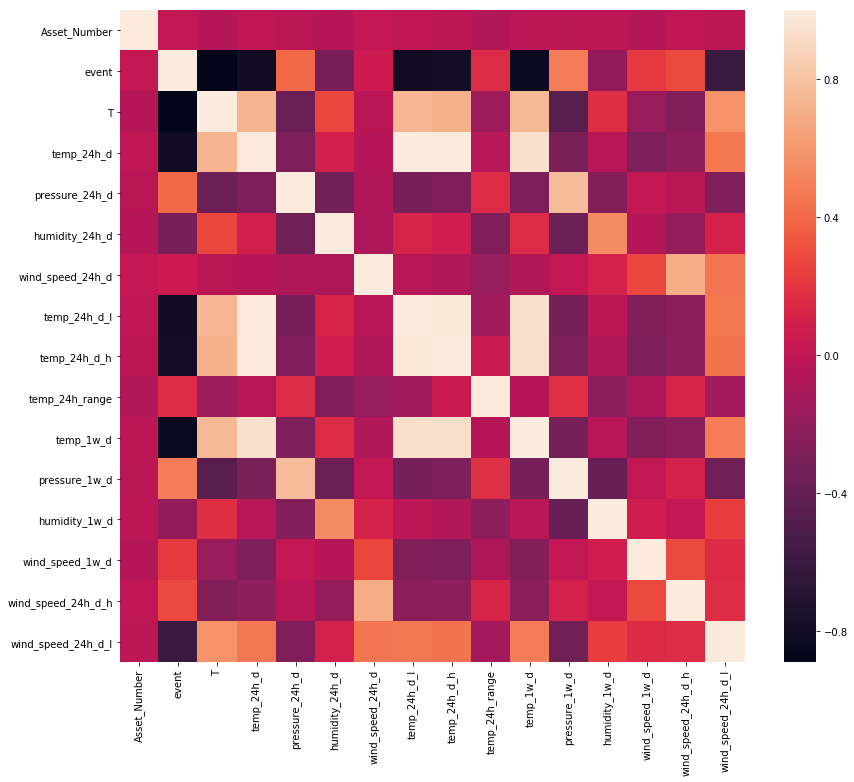

In [42]:


ax=plt.figure(figsize=(14,12))
corr = df_cox2.corr()

ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [43]:
df_cox2.describe()

,Asset_Number,event,T,temp_24h_d,pressure_24h_d,humidity_24h_d,wind_speed_24h_d,temp_24h_d_l,temp_24h_d_h,temp_24h_range,temp_1w_d,pressure_1w_d,humidity_1w_d,wind_speed_1w_d,wind_speed_24h_d_h,wind_speed_24h_d_l
count,9.390000e+02,939.000000,939.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,2.727434e+06,0.322684,436.905493,13.840282,1008.272297,87.555405,4.039865,12.363595,15.267502,2.903907,287.045966,1008.336486,87.355405,3.502027,7.074324,2.293243
std,4.029192e+06,0.467752,397.615476,4.858607,7.636523,6.695759,1.159519,4.876467,4.839476,0.851925,4.700863,6.559008,4.537996,0.729475,1.772941,1.016352
min,4.807500e+04,0.000000,-554.969178,-1.560000,982.000000,39.000000,1.000000,-3.000000,0.000000,0.000000,273.330000,989.000000,66.000000,2.000000,3.000000,0.000000
25%,1.012964e+06,0.000000,47.312535,11.600000,1005.000000,87.000000,4.000000,10.000000,13.000000,2.220000,285.233750,1005.000000,88.000000,3.000000,6.000000,2.000000
50%,1.452484e+06,0.000000,530.189897,16.420000,1006.000000,88.000000,4.000000,15.000000,17.780000,2.780000,289.690000,1006.000000,88.000000,3.000000,7.000000,3.000000
75%,2.439966e+06,1.000000,794.357605,16.736250,1007.000000,93.000000,4.000000,15.000000,18.330000,3.330000,289.750000,1007.000000,88.000000,4.000000,7.000000,3.000000
max,1.880800e+07,1.000000,971.231551,20.335000,1036.000000,100.000000,10.000000,18.500000,21.500000,8.000000,291.510000,1031.000000,100.000000,6.000000,21.000000,6.000000


In [44]:
# min average temp 24h before death
def temp_average_1w_d_l(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=7)) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['temp_min'].mean()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=7))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['temp_min'].mean()
    
# max average temp 24h before death
def temp_average_1w_d_h(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=7)) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['temp_max'].mean()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=7))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['temp_max'].mean()

In [45]:
df_cox2['temp_1w_d_l'] = df_cox2.apply(lambda row: temp_average_1w_d_l(row), axis=1)
df_cox2['temp_1w_d_h'] = df_cox2.apply(lambda row: temp_average_1w_d_h(row), axis=1)

In [46]:
df_cox2['temp_1w_d']= df_cox2['temp_1w_d'] - 273.15
df_cox2['temp_1w_d_l'] = df_cox2['temp_1w_d_l'] - 273.15
df_cox2['temp_1w_d_h'] = df_cox2['temp_1w_d_h'] - 273.15

In [47]:
df_cox2['temp_1w_range']= df_cox2['temp_1w_d_h'] - df_cox2['temp_1w_d_l']

In [73]:
df_cox2.to_csv('df_cox2.csv', index=False)

In [2]:
df_cox2= pd.read_csv('df_cox2.csv')

In [3]:
df_cox2.head()

,Asset_Number,ELR,High_Level_Asset_Class,Asset_Class_Grouping,Grouping_Full_Name,Engineering_Suffix,System_Asset_Type,EQUIP_CLASS_DESC,birth,death,...,temp_24h_range,temp_1w_d,pressure_1w_d,humidity_1w_d,wind_speed_1w_d,wind_speed_24h_d_h,wind_speed_24h_d_l,temp_1w_range,wind_speed_1w_d_h,wind_speed_1w_d_l
0,1011867,NOC,E&P,E&P,E&P,GENERATOR / SHORE SUPPLY,DIESEL GENERATOR SET - 650V,Diesel Alternator Set ...,2017-02-18 04:00:01,NaN,...,2.78,16.54,1006.0,88.0,4.0,7.0,3.0,4.024564,7.0,0.0
1,1648347,MVN2,E&P,E&P,E&P,TRACK CIRCUIT,TRACK CCT -DC MED VOLT AC IMMUNE,Diesel Alternator Set ...,2017-07-06 06:10:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1063020,NOC,E&P,E&P,E&P,LEVEL CROSSING LIGHTING,LIGHTING SYSTEM - LEVEL CROSSING,Light InstalSys ...,2017-05-18 15:30:01,NaN,...,2.22,17.07,1005.0,88.0,3.0,6.0,2.0,4.043420,8.0,0.0
3,10290424,TCW1,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2017-05-22 10:06:01,NaN,...,2.22,17.07,1005.0,88.0,3.0,6.0,2.0,4.043420,8.0,0.0
4,14105964,CFM,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2018-06-06 20:06:00,2018-04-12 13:13:00,...,1.00,6.86,1008.0,93.0,4.0,5.0,3.0,2.196825,9.0,0.0


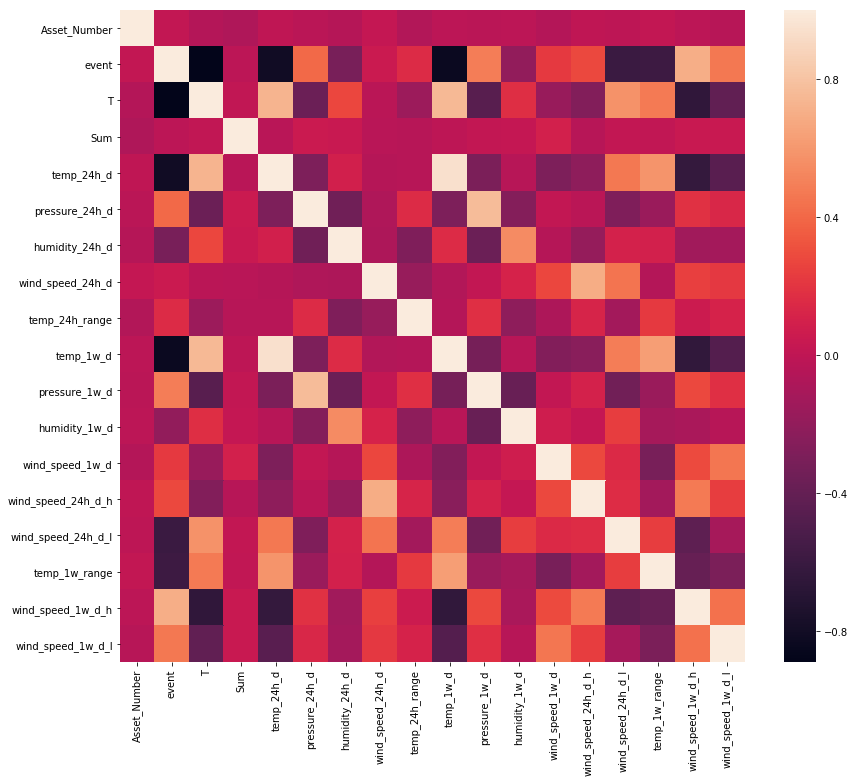

In [6]:



ax=plt.figure(figsize=(14,12))
corr = df_cox2.corr()

ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
#df_cox2.drop(['temp_1w_d_l', 'temp_1w_d_h', 'temp_24h_d_l', 'temp_24h_d_h'], axis=1, inplace=True)

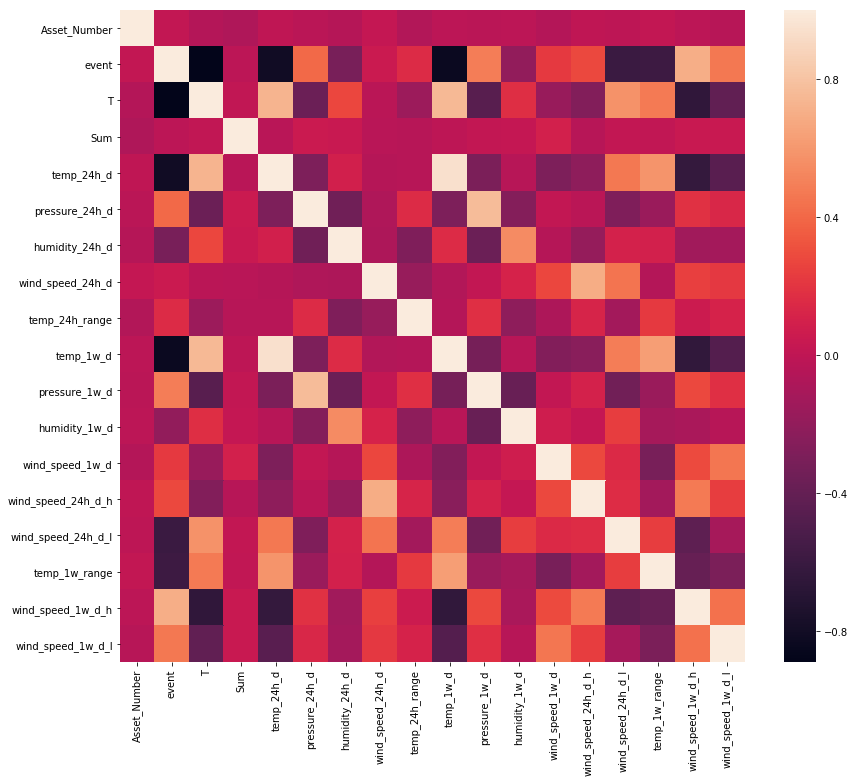

In [9]:
ax=plt.figure(figsize=(14,12))
corr = df_cox2.corr()

ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
df_cox2.isnull().sum()

Asset_Number                0
ELR                         0
High_Level_Asset_Class      0
Asset_Class_Grouping        0
Grouping_Full_Name         25
Engineering_Suffix          0
System_Asset_Type           0
EQUIP_CLASS_DESC            0
birth                       0
death                     636
event                       0
duration                    0
T                           0
weather_station             0
Sum                         0
temp_24h_d                199
pressure_24h_d            199
humidity_24h_d            199
wind_speed_24h_d          199
temp_24h_range            199
temp_1w_d                 199
pressure_1w_d             199
humidity_1w_d             199
wind_speed_1w_d           199
wind_speed_24h_d_h        199
wind_speed_24h_d_l        199
temp_1w_range             199
wind_speed_1w_d_h         199
wind_speed_1w_d_l         199
dtype: int64

In [11]:
df_cox2.columns

Index(['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'weather_station', 'Sum', 'temp_24h_d', 'pressure_24h_d',
       'humidity_24h_d', 'wind_speed_24h_d', 'temp_24h_range', 'temp_1w_d',
       'pressure_1w_d', 'humidity_1w_d', 'wind_speed_1w_d',
       'wind_speed_24h_d_h', 'wind_speed_24h_d_l', 'temp_1w_range',
       'wind_speed_1w_d_h', 'wind_speed_1w_d_l'],
      dtype='object')

In [12]:
df_cox2['T'].describe()

count    939.000000
mean     436.905493
std      397.615476
min     -554.969178
25%       47.312535
50%      530.189897
75%      794.357605
max      971.231551
Name: T, dtype: float64

In [13]:
df_cox3=df_cox2[['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'event', 'duration', 'T',
       'weather_station', 'Sum', 'temp_24h_d', 'pressure_24h_d',
       'humidity_24h_d', 'wind_speed_24h_d', 'temp_24h_range', 'temp_1w_d',
       'pressure_1w_d', 'humidity_1w_d', 'wind_speed_1w_d',
       'wind_speed_24h_d_h', 'wind_speed_24h_d_l', 'temp_1w_range']].copy()

In [15]:
import patsy
X1 = patsy.dmatrix('Asset_Number + High_Level_Asset_Class + event + T + weather_station + temp_24h_d + pressure_24h_d + humidity_24h_d + wind_speed_24h_d + temp_24h_range + temp_1w_d + pressure_1w_d + humidity_1w_d + wind_speed_1w_d + wind_speed_24h_d_h + wind_speed_24h_d_l + temp_1w_range', df_cox3, return_type='dataframe')

X1.head()

,Intercept,High_Level_Asset_Class[T.P&C],High_Level_Asset_Class[T.S&T],High_Level_Asset_Class[T.Track],weather_station[T.Leeds],weather_station[T.Manchester],weather_station[T.Mirfield],weather_station[T.York],Asset_Number,event,...,humidity_24h_d,wind_speed_24h_d,temp_24h_range,temp_1w_d,pressure_1w_d,humidity_1w_d,wind_speed_1w_d,wind_speed_24h_d_h,wind_speed_24h_d_l,temp_1w_range
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1011867.0,0.0,...,88.0,4.0,2.78,16.54,1006.0,88.0,4.0,7.0,3.0,4.024564
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1063020.0,0.0,...,93.0,4.0,2.22,17.07,1005.0,88.0,3.0,6.0,2.0,4.043420
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10290424.0,0.0,...,93.0,4.0,2.22,17.07,1005.0,88.0,3.0,6.0,2.0,4.043420
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,...,100.0,4.0,1.00,6.86,1008.0,93.0,4.0,5.0,3.0,2.196825
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,...,75.0,10.0,5.00,4.75,1021.0,86.0,3.0,21.0,1.0,4.512821


In [16]:
del X1['Intercept']

In [18]:
X1.isnull().sum()

High_Level_Asset_Class[T.P&C]      0
High_Level_Asset_Class[T.S&T]      0
High_Level_Asset_Class[T.Track]    0
weather_station[T.Leeds]           0
weather_station[T.Manchester]      0
weather_station[T.Mirfield]        0
weather_station[T.York]            0
Asset_Number                       0
event                              0
T                                  0
temp_24h_d                         0
pressure_24h_d                     0
humidity_24h_d                     0
wind_speed_24h_d                   0
temp_24h_range                     0
temp_1w_d                          0
pressure_1w_d                      0
humidity_1w_d                      0
wind_speed_1w_d                    0
wind_speed_24h_d_h                 0
wind_speed_24h_d_l                 0
temp_1w_range                      0
dtype: int64

In [19]:
X1.to_csv('X1.csv')

In [59]:
cph = CoxPHFitter(penalizer=0.1)
cph.fit(X1, 'T', 'event', cluster_col='Asset_Number',show_progress=True, step_size=0.50)
cph.print_summary()

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation:
https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
Matrix is singular.

In [62]:
def wind_speed_average_1w_d_h(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=7))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['wind_speed'].max()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=7))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['wind_speed'].max()
    
def wind_speed_average_1w_d_l(df_cox2):
    if df_cox2['event'] == 1:
        mask = (weather['dt_iso'] <= df_cox2['death']) & (weather['dt_iso'] >= df_cox2['death'] - dt.timedelta(days=7))& (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask]['wind_speed'].min()
    else:
        mask2 = (weather['dt_iso'] >= (max(weather['dt_iso']) - dt.timedelta(days=7))) & (weather['city_name'] == df_cox2['weather_station'])
        return weather[mask2]['wind_speed'].min()

In [63]:
df_cox2['wind_speed_1w_d_h'] = df_cox2.apply(lambda row: wind_speed_average_1w_d_h(row), axis=1)
df_cox2['wind_speed_1w_d_l'] = df_cox2.apply(lambda row: wind_speed_average_1w_d_l(row), axis=1)

In [64]:
df_cox2.head()

,Asset_Number,ELR,High_Level_Asset_Class,Asset_Class_Grouping,Grouping_Full_Name,Engineering_Suffix,System_Asset_Type,EQUIP_CLASS_DESC,birth,death,...,temp_24h_range,temp_1w_d,pressure_1w_d,humidity_1w_d,wind_speed_1w_d,wind_speed_24h_d_h,wind_speed_24h_d_l,temp_1w_range,wind_speed_1w_d_h,wind_speed_1w_d_l
0,1011867,NOC,E&P,E&P,E&P,GENERATOR / SHORE SUPPLY,DIESEL GENERATOR SET - 650V,Diesel Alternator Set ...,2017-02-18 04:00:01,NaT,...,2.78,16.54,1006.0,88.0,4.0,7.0,3.0,4.024564,7.0,0.0
1,1648347,MVN2,E&P,E&P,E&P,TRACK CIRCUIT,TRACK CCT -DC MED VOLT AC IMMUNE,Diesel Alternator Set ...,2017-07-06 06:10:00,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1063020,NOC,E&P,E&P,E&P,LEVEL CROSSING LIGHTING,LIGHTING SYSTEM - LEVEL CROSSING,Light InstalSys ...,2017-05-18 15:30:01,NaT,...,2.22,17.07,1005.0,88.0,3.0,6.0,2.0,4.043420,8.0,0.0
3,10290424,TCW1,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2017-05-22 10:06:01,NaT,...,2.22,17.07,1005.0,88.0,3.0,6.0,2.0,4.043420,8.0,0.0
4,14105964,CFM,E&P,E&P,E&P,ELECTRICAL SUPPLY POINT,ELECTRICITY SUPPLY POINT,PV - Electricity Supply Point ...,2018-06-06 20:06:00,2018-04-12 13:13:00,...,1.00,6.86,1008.0,93.0,4.0,5.0,3.0,2.196825,9.0,0.0


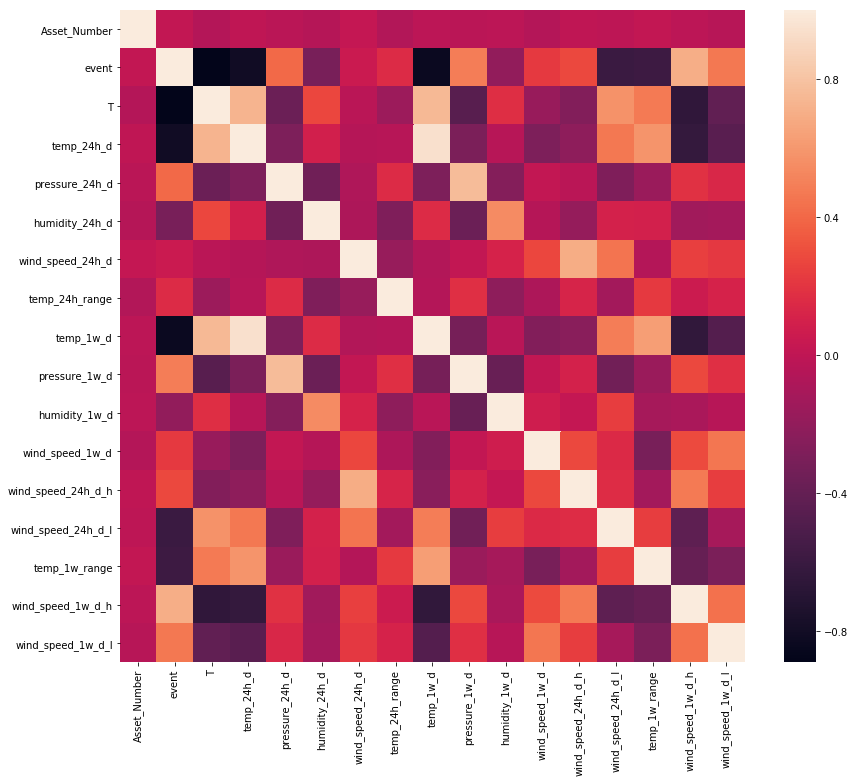

In [65]:
ax=plt.figure(figsize=(14,12))
corr = df_cox2.corr()

ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [66]:
df_cox3 = df_cox2[['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'event', 'duration', 'T',
       'weather_station', 'Sum', 'temp_24h_d', 'pressure_24h_d',
       'humidity_24h_d', 'wind_speed_24h_d', 'wind_speed_24h_d_h', 'wind_speed_24h_d_l',
        'temp_24h_range', 'temp_1w_d','pressure_1w_d', 'humidity_1w_d', 'wind_speed_1w_d',
       'wind_speed_1w_d_h', 'wind_speed_1w_d_l', 'temp_1w_range']].copy()

In [67]:
import patsy
X1 = patsy.dmatrix('Asset_Number + High_Level_Asset_Class + event + T  + weather_station + temp_24h_d + pressure_24h_d + humidity_24h_d + wind_speed_24h_d + wind_speed_24h_d_h + wind_speed_24h_d_l + temp_24h_range + temp_1w_d + pressure_1w_d + humidity_1w_d + wind_speed_1w_d + wind_speed_1w_d_h + wind_speed_1w_d_l + temp_1w_range', df_cox3, return_type='dataframe')

X1

,Intercept,High_Level_Asset_Class[T.P&C],High_Level_Asset_Class[T.S&T],High_Level_Asset_Class[T.Track],weather_station[T.Leeds],weather_station[T.Manchester],weather_station[T.Mirfield],weather_station[T.York],Asset_Number,event,...,wind_speed_24h_d_h,wind_speed_24h_d_l,temp_24h_range,temp_1w_d,pressure_1w_d,humidity_1w_d,wind_speed_1w_d,wind_speed_1w_d_h,wind_speed_1w_d_l,temp_1w_range
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1011867.0,0.0,...,7.0,3.0,2.780,16.5400,1006.0,88.0,4.0,7.0,0.0,4.024564
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1063020.0,0.0,...,6.0,2.0,2.220,17.0700,1005.0,88.0,3.0,8.0,0.0,4.043420
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10290424.0,0.0,...,6.0,2.0,2.220,17.0700,1005.0,88.0,3.0,8.0,0.0,4.043420
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,...,5.0,3.0,1.000,6.8600,1008.0,93.0,4.0,9.0,0.0,2.196825
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,...,21.0,1.0,5.000,4.7500,1021.0,86.0,3.0,21.0,0.0,4.512821
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,...,5.0,1.0,5.000,8.6400,1022.0,75.0,4.0,9.0,1.0,3.218935
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,0.0,...,6.0,2.0,2.220,17.0700,1005.0,88.0,3.0,8.0,0.0,4.043420
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10290512.0,1.0,...,5.0,1.0,2.000,6.0215,1018.0,87.5,3.0,13.0,0.0,2.769565
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10290474.0,0.0,...,7.0,3.0,2.780,16.5400,1006.0,88.0,4.0,7.0,0.0,4.024564
10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10290512.0,0.0,...,7.0,3.0,2.780,16.5400,1006.0,88.0,4.0,7.0,0.0,4.024564


In [69]:
del X1['Intercept']

KeyError: 'Intercept'

In [72]:
cph = CoxPHFitter()
cph.fit(X1, 'T', 'event', cluster_col='Asset_Number',show_progress=True, step_size=.10)
cph.print_summary()

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation:
https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
Matrix is singular.

In [70]:
prediction = cph.predict_survival_function(X1, times=[1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198., 199., 200., 201., 202., 203., 204., 205., 206., 207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220., 221., 222., 223., 224., 225., 226., 227., 228., 229., 230., 231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 242., 243., 244., 245., 246., 247., 248., 249., 250., 251., 252., 253., 254., 255., 256., 257., 258., 259., 260., 261., 262., 263., 264., 265., 266., 267., 268., 269., 270., 271., 272., 273., 274., 275., 276., 277., 278., 279., 280., 281., 282., 283., 284., 285., 286., 287., 288., 289., 290., 291., 292., 293., 294., 295., 296., 297., 298., 299., 300., 301., 302., 303., 304., 305., 306., 307., 308., 309., 310., 311., 312., 313., 314., 315., 316., 317., 318., 319., 320., 321., 322., 323., 324., 325., 326., 327., 328., 329., 330., 331., 332., 333., 334., 335., 336., 337., 338., 339., 340., 341., 342., 343., 344., 345., 346., 347., 348., 349., 350., 351., 352., 353., 354., 355., 356., 357., 358., 359., 360., 361., 362., 363., 364., 365., 366., 367., 368., 369., 370., 371., 372., 373., 374., 375., 376., 377., 378., 379., 380., 381., 382., 383., 384., 385., 386., 387., 388., 389., 390., 391., 392., 393., 394., 395., 396., 397., 398., 399., 400., 401., 402., 403., 404., 405., 406., 407., 408., 409., 410., 411., 412., 413., 414., 415., 416., 417., 418., 419., 420., 421., 422., 423., 424., 425., 426., 427., 428., 429., 430., 431., 432., 433., 434., 435., 436., 437., 438., 439., 440., 441., 442., 443., 444., 445., 446., 447., 448., 449., 450., 451., 452., 453., 454., 455., 456., 457., 458., 459., 460., 461., 462., 463., 464., 465., 466., 467., 468., 469., 470., 471., 472., 473., 474., 475., 476., 477., 478., 479., 480., 481., 482., 483., 484., 485., 486., 487., 488., 489., 490., 491., 492., 493., 494., 495., 496., 497., 498., 499., 500., 501., 502., 503., 504., 505., 506., 507., 508., 509., 510., 511., 512., 513., 514., 515., 516., 517., 518., 519., 520., 521., 522., 523., 524., 525., 526., 527., 528., 529., 530., 531., 532., 533., 534., 535., 536., 537., 538., 539., 540., 541., 542., 543.])
prediction

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,936,937,938,939
1.0,0.999557,0.959384,0.981203,0.977779,0.999557,0.994712,0.998785,0.974977,0.998785,0.998785,...,0.999205,0.999710,0.999710,0.999710,0.999311,0.999140,0.999710,0.999710,0.999710,0.999749
2.0,0.999164,0.924744,0.964828,0.958485,0.999164,0.990045,0.997709,0.953310,0.997709,0.997709,...,0.998500,0.999453,0.999453,0.999453,0.998700,0.998377,0.999453,0.999453,0.999453,0.999527
3.0,0.998960,0.907257,0.956435,0.948619,0.998960,0.987631,0.997151,0.942251,0.997151,0.997151,...,0.998134,0.999319,0.999319,0.999319,0.998383,0.997982,0.999319,0.999319,0.999319,0.999411
4.0,0.998742,0.888908,0.947533,0.938173,0.998742,0.985053,0.996554,0.930558,0.996554,0.996554,...,0.997743,0.999176,0.999176,0.999176,0.998044,0.997559,0.999176,0.999176,0.999176,0.999288
5.0,0.996895,0.747574,0.875343,0.854135,0.996895,0.963480,0.991509,0.837111,0.991509,0.991509,...,0.994432,0.997966,0.997966,0.997966,0.995176,0.993979,0.997966,0.997966,0.997966,0.998241
6.0,0.996498,0.720210,0.860531,0.837047,0.996498,0.958897,0.990426,0.818248,0.990426,0.990426,...,0.993721,0.997706,0.997706,0.997706,0.994559,0.993210,0.997706,0.997706,0.997706,0.998016
7.0,0.996093,0.693359,0.845698,0.819987,0.996093,0.954249,0.989323,0.799467,0.989323,0.989323,...,0.992997,0.997440,0.997440,0.997440,0.993931,0.992427,0.997440,0.997440,0.997440,0.997786
8.0,0.995793,0.674092,0.834861,0.807558,0.995793,0.950816,0.988506,0.785815,0.988506,0.988506,...,0.992460,0.997244,0.997244,0.997244,0.993465,0.991847,0.997244,0.997244,0.997244,0.997616
9.0,0.995226,0.639084,0.814732,0.784552,0.995226,0.944354,0.986962,0.760616,0.986962,0.986962,...,0.991444,0.996871,0.996871,0.996871,0.992585,0.990750,0.996871,0.996871,0.996871,0.997294
10.0,0.994741,0.610632,0.797927,0.765425,0.994741,0.938870,0.985646,0.739738,0.985646,0.985646,...,0.990578,0.996554,0.996554,0.996554,0.991834,0.989813,0.996554,0.996554,0.996554,0.997019


In [72]:
df_cox3.to_csv('cox_master.csv')
X1.to_csv('cox_master_dummy.csv')
prediction.to_csv('cox_master_prediciton.csv')